In [30]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/scorecard.txt", sep="\\t")
print(df.head())

    UNITID    OPEID                                 NAME        CITY STATE  \
0  6100654   100200             Alabama A & M University      Normal    AL   
1   100663   105200  University of Alabama at Birmingham  Birmingham    AL   
2   100690  2503400                   Amridge University  Montgomery    AL   
3   100706   105500  University of Alabama in Huntsville  Huntsville    AL   
4   100724   100500             Alabama State University  Montgomery    AL   

          ZIP   MAINCAMPUS       HIGHESTDEG     TYPE  \
0       35762  Main campus  Graduate degree   Public   
1  35294-0110  Main campus  Graduate degree   Public   
2  36117-3553  Main campus  Graduate degree  Private   
3       35899  Main campus  Graduate degree   Public   
4  36104-0271  Main campus  Graduate degree   Public   

                                              LOCALE  ... EXP.PER.STD  \
0  City: Midsize (population of at least 100,000 ...  ...        5384   
1  City: Midsize (population of at least 100,000

/var/folders/_x/xwgfzrxd5tb8jhbprlvlrtr40000gn/T/ipykernel_59804/389702224.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("../../data/scorecard.txt", sep="\\t")


Create a summary of conditional distribution of locale (12 types) given 

In [31]:
# create a crosstab of locale 2 and type
crosstab = pd.crosstab(df["LOCALE 2"], df["TYPE"], normalize="index") * 100
print(crosstab)

TYPE      For Profit    Private     Public
LOCALE 2                                  
City       22.022080  42.184776  35.793144
Rural       3.133159  26.370757  70.496084
Suburb     21.845175  42.417815  35.737010
Town        2.384738  35.453100  62.162162


### The normalize argument can be used in differnt ways:

## 🔢 normalize=False (default)
Returns raw counts (frequencies).

Example: How many schools of each type exist in each locale.

```pd.crosstab(df["LOCALE 2"], df["TYPE"])```

## 📊 normalize='index'
Row-wise normalization: each row sums to 1 (or 100% if you multiply).

Useful for comparing composition within each LOCALE 2 group.

```pd.crosstab(df["LOCALE 2"], df["TYPE"], normalize='index')```

## 📊 normalize='columns'
Column-wise normalization: each column sums to 1.

Useful for comparing distribution across LOCALE 2 for each school type.

```pd.crosstab(df["LOCALE 2"], df["TYPE"], normalize='columns')```

## 📊 normalize=True
Normalizes the entire table — the values sum to 1 across the whole table.

Good for seeing relative frequency of each cell in the full dataset.

```pd.crosstab(df["LOCALE 2"], df["TYPE"], normalize=True)```


# How to Display the data
## Stacked Bar Chart

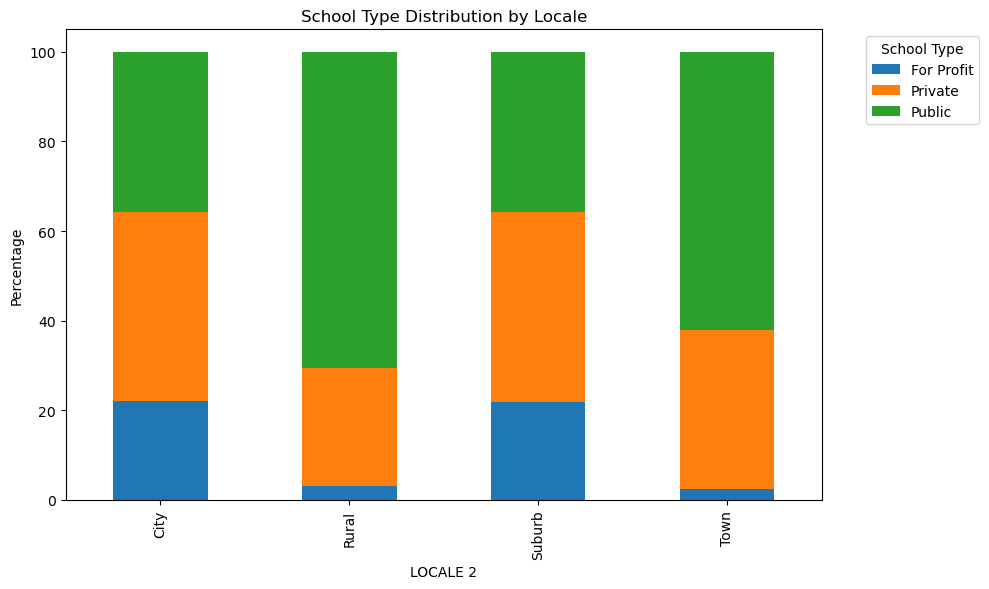

In [32]:
# summary of distibution of locale
# fig: Figure = plt.figure()
# ax: Axes = fig.add_subplot()

import matplotlib.pyplot as plt

# Get row-normalized data
crosstab = pd.crosstab(df["LOCALE 2"], df["TYPE"], normalize='index') * 100

# Plot
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel("Percentage")
plt.title("School Type Distribution by Locale")
plt.legend(title="School Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Grouped Bar Chart

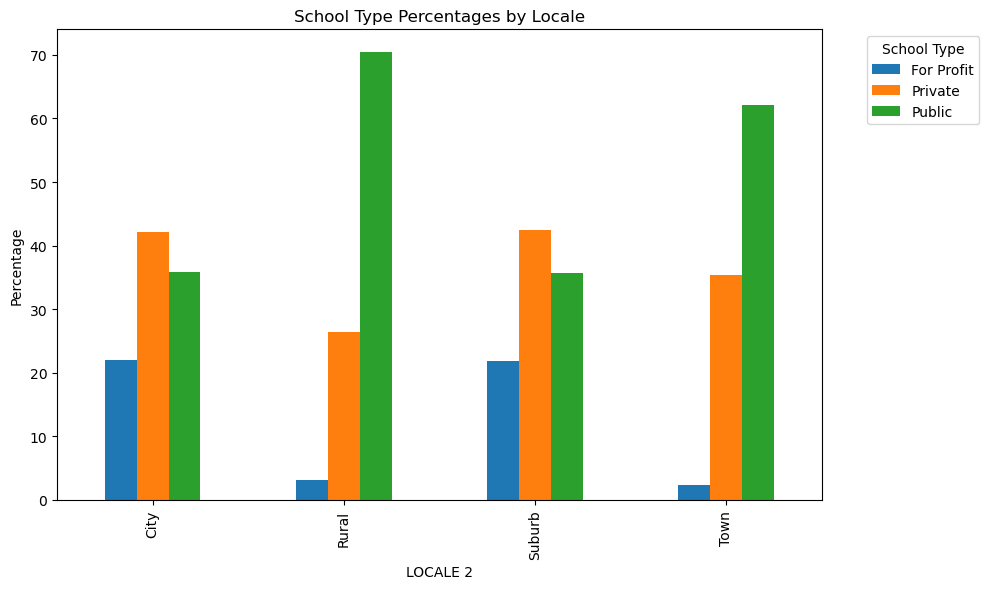

In [33]:
crosstab.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.ylabel("Percentage")
plt.title("School Type Percentages by Locale")
plt.legend(title="School Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Heatmap

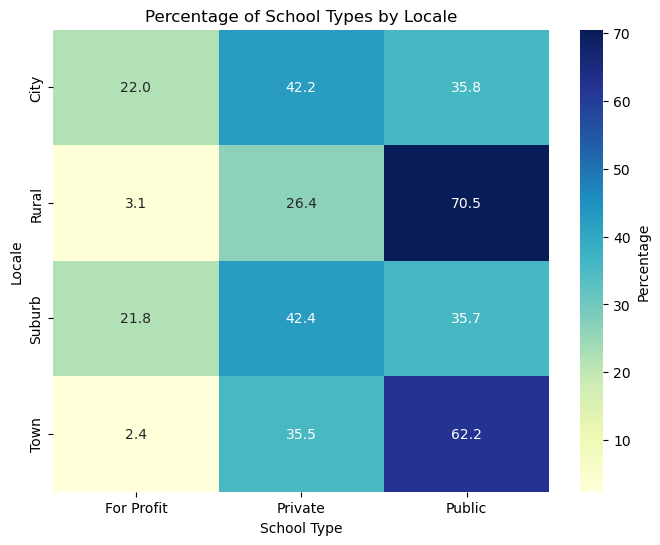

In [34]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Percentage'})
plt.title("Percentage of School Types by Locale")
plt.ylabel("Locale")
plt.xlabel("School Type")
plt.show()
